In [2]:
#hide
#from utils import *
from utils2 import *

# Image classification

## From dogs and cats, to pet breeds

In [3]:
from fastai2.vision.all import *
path = untar_data(URLs.PETS)

In [4]:
#hide
Path.BASE_PATH = path

In [10]:
!ls

01_intro-Copy1.ipynb	     07_sizing_and_tta.ipynb  18_CAM.ipynb
01_intro.ipynb		     08_collab.ipynb	      19_learner.ipynb
02_production-Copy1.ipynb    09_tabular.ipynb	      20_conclusion.ipynb
02_production.ipynb	     10_nlp.ipynb	      app_blog.ipynb
03_ethics-Copy1.ipynb	     11_midlevel_data.ipynb   app_jupyter.ipynb
03_ethics.ipynb		     12_nlp_dive.ipynb	      images
04_mnist_basics-Copy1.ipynb  13_convolutions.ipynb    __pycache__
04_mnist_basics.ipynb	     14_resnet.ipynb	      utils2.py
05_pet_breeds-Copy1.ipynb    15_arch_details.ipynb    utils.py
05_pet_breeds.ipynb	     16_accel_sgd.ipynb
06_multicat.ipynb	     17_foundations.ipynb


In [5]:
path.ls()

(#3) [Path('annotations'),Path('images'),Path('models')]

In [6]:
(path/"images").ls()

(#7394) [Path('images/staffordshire_bull_terrier_149.jpg'),Path('images/Egyptian_Mau_189.jpg'),Path('images/pug_141.jpg'),Path('images/basset_hound_193.jpg'),Path('images/english_cocker_spaniel_142.jpg'),Path('images/Maine_Coon_58.jpg'),Path('images/german_shorthaired_124.jpg'),Path('images/samoyed_100.jpg'),Path('images/British_Shorthair_103.jpg'),Path('images/Sphynx_174.jpg')...]

In [7]:
fname = (path/"images").ls()[0]

In [8]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['staffordshire_bull_terrier']

In [11]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

## Presizing

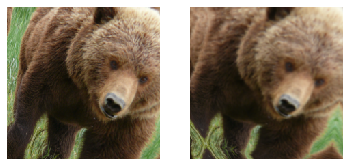

In [12]:
dblock1 = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_y=parent_label,
                   item_tfms=Resize(460))
dls1 = dblock1.dataloaders([(Path.cwd()/'images'/'grizzly.jpg')]*100, bs=8)
dls1.train.get_idxs = lambda: Inf.ones
x,y = dls1.valid.one_batch()
_,axs = subplots(1, 2)

x1 = TensorImage(x.clone())
x1 = x1.affine_coord(sz=224)
x1 = x1.rotate(draw=30, p=1.)
x1 = x1.zoom(draw=1.2, p=1.)
x1 = x1.warp(draw_x=-0.2, draw_y=0.2, p=1.)

tfms = setup_aug_tfms([Rotate(draw=30, p=1, size=224), Zoom(draw=1.2, p=1., size=224),
                       Warp(draw_x=-0.2, draw_y=0.2, p=1., size=224)])
x = Pipeline(tfms)(x)
#x.affine_coord(coord_tfm=coord_tfm, sz=size, mode=mode, pad_mode=pad_mode)
TensorImage(x[0]).show(ctx=axs[0])
TensorImage(x1[0]).show(ctx=axs[1]);

### Checking and debugging a DataBlock

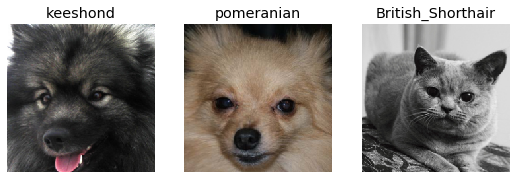

In [13]:
dls.show_batch(nrows=1, ncols=3)

In [14]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
pets1.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/mmp/.fastai/data/oxford-iiit-pet/images/basset_hound_7.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x332
  Pipeline: partial -> Categorize
    starting from
      /home/mmp/.fastai/data/oxford-iiit-pet/images/basset_hound_7.jpg
    applying partial gives
      basset_hound
    applying Categorize gives
      TensorCategory(14)

Final sample: (PILImage mode=RGB size=500x332, TensorCategory(14))


Setting up after_item: Pipeline: ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: ToTensor
    starting from
      (PILImage mode=RGB size=500x332, TensorCategory(14))
    applying ToTensor gives
      (TensorImage o

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 332 and 500 in dimension 2 at /opt/conda/conda-bld/pytorch_1579022060824/work/aten/src/TH/generic/THTensor.cpp:612

In [15]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.500092,0.353024,0.115697,00:20


Traceback (most recent call last):
  File "/home/mmp/anaconda3/envs/fastai2/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/mmp/anaconda3/envs/fastai2/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/mmp/anaconda3/envs/fastai2/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/mmp/anaconda3/envs/fastai2/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

In [16]:
dir(learn)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bn_bias_state',
 '_call_one',
 '_do_begin_fit',
 '_do_epoch_train',
 '_do_epoch_validate',
 '_metrics',
 '_split',
 'add_cb',
 'add_cbs',
 'added_cbs',
 'all_batches',
 'cbs',
 'create_mbar',
 'create_opt',
 'dl',
 'dls',
 'epoch',
 'export',
 'final_record',
 'fine_tune',
 'fit',
 'fit_flat_cos',
 'fit_one_cycle',
 'fit_sgdr',
 'freeze',
 'freeze_to',
 'get_preds',
 'iter',
 'load',
 'logger',
 'loss',
 'loss_func',
 'loss_not_reduced',
 'lr',
 'lr_find',
 'metrics',
 'model',
 'model_dir',
 'moms',
 'n_epoch',
 'n_iter',
 'no_bar',
 'no_logging',
 'no_mbar',
 'one_batch',
 'opt',
 'opt_func',
 'ordered_cb

In [54]:
learn.dls

In [62]:
torch.rand(3,512,512).shape

torch.Size([3, 512, 512])

In [63]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [60]:
learn.dl.dataset[0]

(PILImage mode=RGB size=500x332, TensorCategory(14))

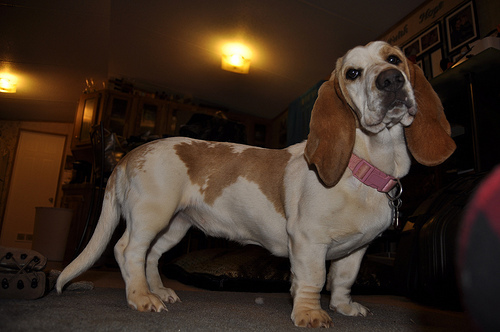

In [30]:
learn.dl.dataset[0][0]

In [31]:
learn.dl.dataset[0][1]

TensorCategory(14)

In [37]:
resnet34()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [65]:
learn.model[0][0]

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [42]:
type(learn.model[0][0])

torch.nn.modules.conv.Conv2d

In [66]:
learn.model[0]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [75]:
learn.model.cpu()

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [76]:
learn.model[0](torch.rand(32, 3, 224, 224)).shape

torch.Size([32, 512, 7, 7])

In [79]:
learn.model[1](torch.rand(32, 512, 7, 7)).shape

torch.Size([32, 37])

In [80]:
learn.model(torch.rand(32, 3, 224, 224)).shape

torch.Size([32, 37])

In [34]:
learn.model[1]

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=37, bias=False)
)

In [17]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [38]:
learn.opt_func

<function fastai2.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

In [39]:
learn.opt

## Cross entropy loss

### Viewing activations and labels

In [ ]:
x,y = dls.one_batch()

In [ ]:
y

TensorCategory([11,  0,  0,  5, 20,  4, 22, 31, 23, 10, 20,  2,  3, 27, 18, 23, 33,  5, 24,  7,  6, 12,  9, 11, 35, 14, 10, 15,  3,  3, 21,  5, 19, 14, 12, 15, 27,  1, 17, 10,  7,  6, 15, 23, 36,  1, 35,  6,
         4, 29, 24, 32,  2, 14, 26, 25, 21,  0, 29, 31, 18,  7,  7, 17], device='cuda:5')

In [ ]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([7.9069e-04, 6.2350e-05, 3.7607e-05, 2.9260e-06, 1.3032e-05, 2.5760e-05, 6.2341e-08, 3.6400e-07, 4.1311e-06, 1.3310e-04, 2.3090e-03, 9.9281e-01, 4.6494e-05, 6.4266e-07, 1.9780e-06, 5.7005e-07,
        3.3448e-06, 3.5691e-03, 3.4385e-06, 1.1578e-05, 1.5916e-06, 8.5567e-08, 5.0773e-08, 2.2978e-06, 1.4150e-06, 3.5459e-07, 1.4599e-04, 5.6198e-08, 3.4108e-07, 2.0813e-06, 8.0568e-07, 4.3381e-07,
        1.0069e-05, 9.1020e-07, 4.8714e-06, 1.2734e-06, 2.4735e-06])

In [ ]:
len(preds[0]),preds[0].sum()

(37, tensor(1.0000))

### Softmax

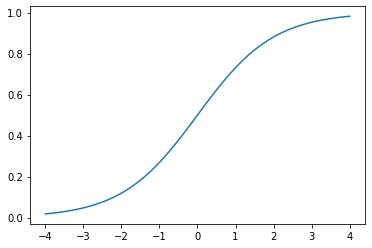

In [ ]:
plot_function(torch.sigmoid, min=-4,max=4)

In [ ]:
#hide
torch.random.manual_seed(42);

In [ ]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [ ]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [ ]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [ ]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

### Log likelihood

In [ ]:
targ = tensor([0,1,0,1,1,0])

In [ ]:
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [ ]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])

In [ ]:
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]
t = df.style.hide_index()
#To have html code compatible with our script
html = t._repr_html_().split('</style>')[1]
html = re.sub(r'<table id="([^"]+)"\s*>', r'<table >', html)
display(HTML(html))

3,7,targ,idx,loss
0.602469,0.397531,0,0,0.602469
0.502065,0.497935,1,1,0.497935
0.133188,0.866811,0,2,0.133188
0.99664,0.00336017,1,3,0.00336017
0.595949,0.404051,1,4,0.404051
0.366118,0.633882,0,5,0.366118


In [ ]:
-sm_acts[idx, targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [ ]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

### Taking the `log`

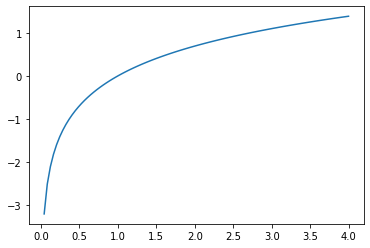

In [ ]:
plot_function(torch.log, min=0,max=4)

In [ ]:
loss_func = nn.CrossEntropyLoss()

In [ ]:
loss_func(acts, targ)

tensor(1.8045)

In [ ]:
F.cross_entropy(acts, targ)

tensor(1.8045)

In [ ]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([0.5067, 0.6973, 2.0160, 5.6958, 0.9062, 1.0048])

## Model Interpretation

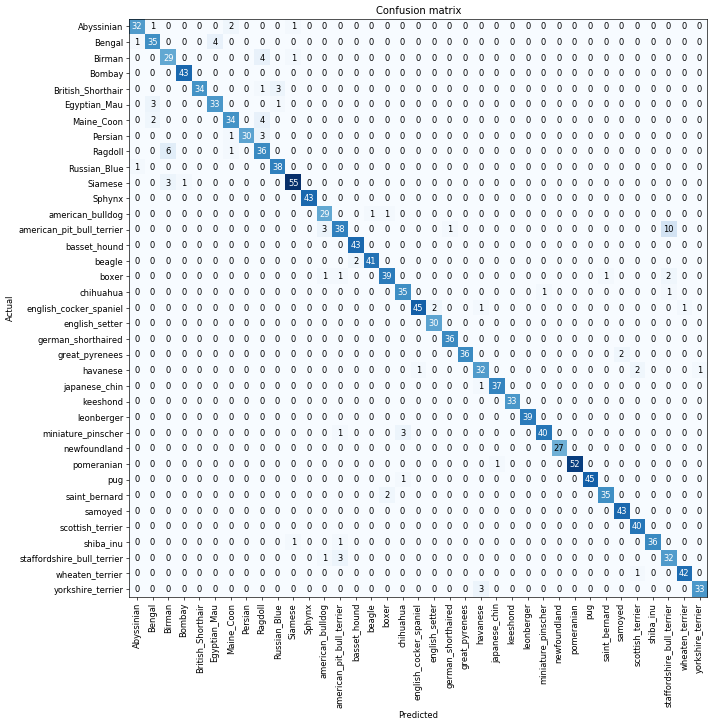

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('Ragdoll', 'Birman', 6)]

## Improving our model

### Learning rate finder

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

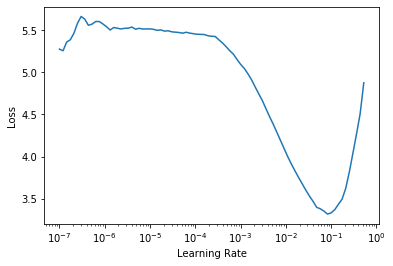

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 8.32e-03, steepest point: 6.31e-03


In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.071820,0.427476,0.133965,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.738273,0.541828,0.150880,00:24
1,0.401544,0.266623,0.081867,00:24


### Unfreezing and transfer learning

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.188042,0.355024,0.102842,00:20
1,0.534234,0.302453,0.094723,00:20
2,0.325031,0.222268,0.074425,00:20


In [ ]:
learn.unfreeze()

(1.0964782268274575e-05, 1.5848931980144698e-06)

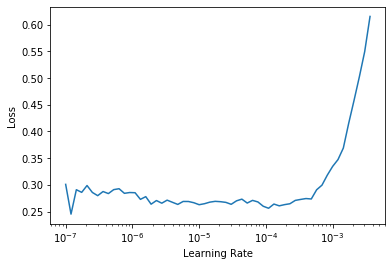

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.263579,0.217419,0.069012,00:24
1,0.253060,0.210346,0.062923,00:24
2,0.224340,0.207357,0.060217,00:24
3,0.200195,0.207244,0.061570,00:24
4,0.194269,0.200149,0.059540,00:25
5,0.173164,0.202301,0.059540,00:25


### Discriminative learning rates

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.145300,0.345568,0.119756,00:20
1,0.533986,0.251944,0.077131,00:20
2,0.317696,0.208371,0.069012,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.257977,0.205400,0.067659,00:25
1,0.246763,0.205107,0.066306,00:25
2,0.240595,0.193848,0.062246,00:25
3,0.209988,0.198061,0.062923,00:25
4,0.194756,0.193130,0.064276,00:25
5,0.169985,0.187885,0.056157,00:25
6,0.153205,0.186145,0.058863,00:25
7,0.141480,0.185316,0.053451,00:25
8,0.128564,0.180999,0.051421,00:25
9,0.126941,0.186288,0.054127,00:25


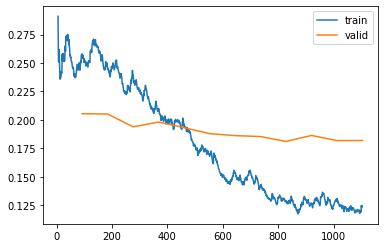

In [ ]:
learn.recorder.plot_loss()

### Selecting the number of epochs

### Deeper architectures

In [ ]:
from fastai2.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,1.427505,0.310554,0.098782,00:21
1,0.606785,0.302325,0.094723,00:22
2,0.409267,0.294803,0.091340,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.261121,0.274507,0.083897,00:26
1,0.296653,0.318649,0.084574,00:26
2,0.242356,0.253677,0.069012,00:26
3,0.150684,0.251438,0.065629,00:26
4,0.094997,0.239772,0.064276,00:26
5,0.061144,0.228082,0.054804,00:26


## Summary

## Questionnaire

1. Why do we first resize to a large size on the CPU, and then to a smaller size on the GPU?
1. If you are not familiar with regular expressions, find a regular expression tutorial, and some problem sets, and complete them. Have a look on the book website for suggestions.
1. What are the two ways in which data is most commonly provided, for most deep learning datasets?
1. Look up the documentation for `L` and try using a few of the new methods is that it adds.
1. Look up the documentation for the Python pathlib module and try using a few methods of the Path class.
1. Give two examples of ways that image transformations can degrade the quality of the data.
1. What method does fastai provide to view the data in a DataLoader?
1. What method does fastai provide to help you debug a DataBlock?
1. Should you hold off on training a model until you have thoroughly cleaned your data?
1. What are the two pieces that are combined into cross entropy loss in PyTorch?
1. What are the two properties of activations that softmax ensures? Why is this important?
1. When might you want your activations to not have these two properties?
1. Calculate the "exp" and "softmax" columns of <<bear_softmax>> yourself (i.e. in a spreadsheet, with a calculator, or in a notebook).
1. Why can't we use torch.where to create a loss function for datasets where our label can have more than two categories?
1. What is the value of log(-2)? Why?
1. What are two good rules of thumb for picking a learning rate from the learning rate finder?
1. What two steps does the fine_tune method do?
1. In Jupyter notebook, how do you get the source code for a method or function?
1. What are discriminative learning rates?
1. How is a Python slice object interpreted when past as a learning rate to fastai?
1. Why is early stopping a poor choice when using one cycle training?
1. What is the difference between resnet 50 and resnet101?
1. What does to_fp16 do?

### Further research

1. Find the paper by Leslie Smith that introduced the learning rate finder, and read it.
1. See if you can improve the accuracy of the classifier in this chapter. What's the best accuracy you can achieve? Have a look on the forums and book website to see what other students have achieved with this dataset, and how they did it.